In [1]:
import os
import nltk
import math
import csv
import ssl
import pickle
import json
import matplotlib.pyplot as plt

In [2]:
with open('vector.pkl', 'rb') as file:
        words = pickle.load(file)
len(words)

10702

In [4]:
vacancy = {
    "id": 1,
	"company": "Mi Empresa",
	"companyNit": "1870385",
	"name": "Front-End Developer",
	"description": """
     Acerca del empleo
About Zoe


Zoe Financial is a wealth platform for consumers to find, hire, and grow their wealth through innovative technology and exceptional client service. Zoe has raised over $24M and is backed by SoftBank and top executives at Blackrock, Charles Schwab, Uber, and Doordash. Its accolades include FastCo’s 2022 Most Innovative Personal Finance Companies, Nerdwallet’s 2022 & 2023 Best Online Financial Advisor, and Morningstar’s Fintech Startup of the Year 2019. The New York-based company has a strong leadership team with over 20 years of industry experience at firms like Morgan Stanley, JP Morgan, Merril Lynch, and Learnvest. We offer the excitement of a rapidly growing company with the stability of a tenured leadership team and advisory board.

We have offices in New York and Bogota, Colombia.


What you get:


We’ve got a highly competitive salary and stock options package (as a member of the team you own a piece of the company we get to build together.) In addition, the Colombian team gets to travel to NYC once a year (Travel expenses paid) for our company offsite!


About the Role


Zoe is looking for a front-end developer to join the Zoe team in our Bogota (Zona Chico, Santa viviana) office. Our ideal candidate will understand how to develop user interfaces for consumers, has the desire to constantly improve the codebase and the product, and wants to enable others to do their job more effectively. The candidate will care deeply about maintaining code and improving software engineering for those around them. Using JavaScript, HTML, and CSS, this candidate will be able to translate user and business needs into functional front-end design.
     """,
	"additionalInfo": """
     Responsibilities


Develop and maintain new user-facing features.
Collaborate with the product team to develop and implement web applications using modern front-end technologies.
Translate UI/UX designs into high-quality code, ensuring performance, responsiveness, and cross-browser compatibility.
Ensure scalability through code reviews, performance tuning, and best practices.
Build reusable code and libraries for future use.
Participate in the entire software development lifecycle, including estimation, development, testing, deployment, and maintenance.
Work closely with the UI/UX designers and back-end developers to ensure seamless integration of front-end and back-end components.
Have the ability to work in a fast-paced environment with a daily release cycle.

You'll love working at Zoe because We...


Are a successful, well funded, fast-growing company with a start-up work vibe
Are passionate about our clients and live/breathe the client experience
Are a technologically and data-driven business
Offer competitive salaries and equity
Are at the forefront of tech & finance, redefining personal finance
Believe in autonomy & taking initiative

Qualifications


3-4+ years of experience implementing front-end web applications
Strong understanding of modern JavaScript frameworks and libraries and the ability to apply them effectively
Proficient understanding of web markup languages, including HTML5 and CSS3
2+ years using the React (or similar) Framework
Strong understanding of JavaScript libraries and TypeScript
Proficiency in version control using Git
Experience setting up development environment tools (compilers, pre-processors, etc)
Self-motivated with a passion for problem-solving and a desire to stay up to date with emerging technologies and industry trends
Proficiency in verbal and written English ( B2/C1 English level required).
     """,
	"salary": 5000000,
	"modality": "Teletrabajo",
	"place": "Cali, Valle del Cauca, Colombia",
	"contract": "Termino indefinido",
	"experience": 48,
	"skills": [
        "Bibliotecas de JavaScript",
        "Desarrollo front end",
        "Diseño de front-end",
        "Experiencia de usuario",
        "Frameworks de JavaScript",
        "HTML5",
        "Hojas de estilos en cascada (CSS)",
        "JavaScript",
        "Markup Languages",
        "React.js",
        "web responsive design",
	],
	"created_at": "2023-05-28T00:30:30.240213Z",
	"updated_at": "2023-06-29T00:30:30.240242Z"
}

In [4]:
sText=" "
for s in vacancy['skills']:
    sText += s
vacancyText = vacancy['description'] + sText + " "+ vacancy['additionalInfo'] +" "+ vacancy['name']
vacancy_V = [word.lower() for word in nltk.word_tokenize(vacancyText) if word.isalpha()]
vacancy_S = [1 if word in vacancy_V else 0 for word in words]
sum(vacancy_S)

179

In [5]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alejandrocaicedo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alejandrocaicedo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def calculate(myWords):
    corpus= {}
    exp={}
    skills={}
    auto_id = 1
    with open('dataTest.csv', 'r',  newline = '') as file_output:
        headers = ['Category', 'Profile', 'Skills', 'Experiences', 'url']
        csv_reader = csv.DictReader(file_output)
        for row in csv_reader:
            exp[auto_id] = int(row['Experiences'])
            skills[auto_id] = eval(row['Skills'])
            justText = row['Profile'] + " " + row['Skills'] + " " + row['Experiences']
            #print(justText)
            corpus[auto_id] = [word.lower() for word in nltk.word_tokenize(justText) if word.isalpha()]
            auto_id += 1

    candidates_S = {}
    for a_id in corpus:
        candidates_S[a_id] = [1 if word in corpus[a_id] else 0 for word in myWords]
   
    sText=" "
    for s in vacancy['skills']:
        sText += s
    vacancyText = vacancy['description'] + sText + " "+ vacancy['additionalInfo'] +" "+ vacancy['name']
    vacancy_V = [word.lower() for word in nltk.word_tokenize(vacancyText) if word.isalpha()]
    vacancy_S = [1 if word in vacancy_V else 0 for word in myWords]
    
    from sklearn.metrics.pairwise import cosine_similarity

    similarity = {}
    
    for a_id in candidates_S:
        similarity[a_id] = cosine_similarity([vacancy_S],[candidates_S[a_id]])[0][0]
    
    similarity = dict(sorted(similarity.items(), key=lambda i: i[1], reverse=True))
    similitud = {}
    for a_id in range(1,21):
        similitud[a_id] = similarity[a_id]

    def compareSkills(vSkl, sSkl):
        total = len(vSkl)
        cumplidas = 0
        vSkl = loweCase(vSkl)
        sSkl = loweCase(sSkl)
        for s in vSkl:
            if s in sSkl:
                #print(s)
                cumplidas += 1
        
        return cumplidas / total
    
    def loweCase(slist):
        lowerArr = []
        for s in slist:
            try:
                lowerArr.append(s.lower())
            except AttributeError:
                lowerArr.append(s['name'].lower())
        return lowerArr
    
    compSkills = {}
    for a_id in range(1,21):
        compSkills[a_id] = compareSkills(vacancy['skills'],skills[a_id])

    compExp = {}
    for a_id in range(1,21):
        req = vacancy['experience']
        std = exp[a_id]
        if std > req:
            compExp[a_id] = 1
        else:
            compExp[a_id] = std / req
    
    scores = {}
    for a_id in range(1,21):
        scores[a_id] = {
            "similitud": similitud[a_id],
            "skills": compSkills[a_id],
            "experiencia": compExp[a_id],
            "score_S": 0.4*similitud[a_id] + 0.6*compSkills[a_id],#+ 0.2*compExp[a_id],
            "score_H": 1*compSkills[a_id] #+ 0.2*compExp[a_id],
        }
    score_S = dict(sorted(scores.items(), key=lambda i: i[1]['score_S'], reverse=True))
    score_H = dict(sorted(scores.items(), key=lambda i: i[1]['score_H'], reverse=True))
    
    return score_S, score_H


In [7]:
def diff(psS,psH):
    conS = 0
    sinS = 0
    for i in list(psS.keys())[:10]:
        if i>10:
            conS+=1
    for i in list(psH.keys())[:10]:
        if i>10:
            sinS+=1
    return conS/sinS
#print(sS.keys())
#print(sH.keys())

In [8]:
data = {}
for i in range(1,len(words)):
    sS, sH = calculate(words[:i])
    comp = diff(sS,sH)
    data[i]=comp
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [10]:
vacancy_B = {
    "id": 1,
	"company": "Mi Empresa",
	"companyNit": "1870385",
	"name": "Desarrollador de Python",
	"description": """
        Acerca del empleo
Python Developer

Job Summary

We are looking for a Python developer with at least 3 years of experience. The candidate should have experience working with Agile environments, remote teams, and CI/CD environments. At ABA Centers of America, engineers do not just write code; they actively participate in the conversation on what and how to build the systems and solutions that matter to our customers. If you love your customers as much as we do, we'd love to hear from you. This is a hybrid position to work in Medellín.

Responsibilities

· Work with Director of Applications in defining goals and roadmaps. Execute Sprints and plan QAs and releases.

· Create clean, maintainable, scalable, and well-tested code.

· Work with other team members to devise the best possible technical solutions to complex problems.

· Work with all levels of staff to design and implement new features, give product demonstrations and support our client's customers.
     """,
	"additionalInfo": """
        Preferred Qualifications And Experience

· BS degree in Computer Science or a similar field of study.

· (Back end) Extensive experience building Enterprise level applications.

· Experience designing and integrating REST, JSON-API, and/or GraphQL.

· Experience building responsive web applications.

· Experience with PostgreSQL in a production environment.

· Experience building hybrid mobile applications.

· Experience automating build and deployment processes PostgreSQL.

· DevOps experience.

· The candidate should be able to read and write in English. Conversational English is a plus but not required
     """,
	"salary": 5000000,
	"modality": "Teletrabajo",
	"place": "Cali, Valle del Cauca, Colombia",
	"contract": "Termino indefinido",
	"experience": 48,
	"skills": [
		"Django",
        "Git",
        "Python",
        "Inglés",
        "DevOps",
        "MongoDB",
        "Pytest",
        "C#",
        "Flask"
	],
	"created_at": "2023-05-28T00:30:30.240213Z",
	"updated_at": "2023-06-29T00:30:30.240242Z"
}

In [11]:
def calculate(myWords):
    corpus= {}
    exp={}
    skills={}
    auto_id = 1
    with open('dataTest.csv', 'r',  newline = '') as file_output:
        headers = ['Category', 'Profile', 'Skills', 'Experiences', 'url']
        csv_reader = csv.DictReader(file_output)
        for row in csv_reader:
            exp[auto_id] = int(row['Experiences'])
            skills[auto_id] = eval(row['Skills'])
            justText = row['Profile'] + " " + row['Skills'] + " " + row['Experiences']
            #print(justText)
            corpus[auto_id] = [word.lower() for word in nltk.word_tokenize(justText) if word.isalpha()]
            auto_id += 1

    candidates_S = {}
    for a_id in corpus:
        candidates_S[a_id] = [1 if word in corpus[a_id] else 0 for word in myWords]
   
    sText=" "
    for s in vacancy_B['skills']:
        sText += s
    vacancyText = vacancy_B['description'] + sText + " "+ vacancy_B['additionalInfo'] +" "+ vacancy_B['name']
    vacancy_V = [word.lower() for word in nltk.word_tokenize(vacancyText) if word.isalpha()]
    vacancy_S = [1 if word in vacancy_V else 0 for word in myWords]
    
    from sklearn.metrics.pairwise import cosine_similarity

    similarity = {}
    
    for a_id in candidates_S:
        similarity[a_id] = cosine_similarity([vacancy_S],[candidates_S[a_id]])[0][0]
    
    similarity = dict(sorted(similarity.items(), key=lambda i: i[1], reverse=True))
    similitud = {}
    for a_id in range(1,21):
        similitud[a_id] = similarity[a_id]

    def compareSkills(vSkl, sSkl):
        total = len(vSkl)
        cumplidas = 0
        vSkl = loweCase(vSkl)
        sSkl = loweCase(sSkl)
        for s in vSkl:
            if s in sSkl:
                #print(s)
                cumplidas += 1
        
        return cumplidas / total
    
    def loweCase(slist):
        lowerArr = []
        for s in slist:
            try:
                lowerArr.append(s.lower())
            except AttributeError:
                lowerArr.append(s['name'].lower())
        return lowerArr
    
    compSkills = {}
    for a_id in range(1,21):
        compSkills[a_id] = compareSkills(vacancy_B['skills'],skills[a_id])

    compExp = {}
    for a_id in range(1,21):
        req = vacancy_B['experience']
        std = exp[a_id]
        if std > req:
            compExp[a_id] = 1
        else:
            compExp[a_id] = std / req
    
    scores = {}
    for a_id in range(1,21):
        scores[a_id] = {
            "similitud": similitud[a_id],
            "skills": compSkills[a_id],
            "experiencia": compExp[a_id],
            "score_S": 0.4*similitud[a_id] + 0.6*compSkills[a_id],#+ 0.2*compExp[a_id],
            "score_H": 1*compSkills[a_id] #+ 0.2*compExp[a_id],
        }
    score_S = dict(sorted(scores.items(), key=lambda i: i[1]['score_S'], reverse=True))
    score_H = dict(sorted(scores.items(), key=lambda i: i[1]['score_H'], reverse=True))
    
    return score_S, score_H


In [12]:
def diff(psS,psH):
    conS = 0
    sinS = 0
    for i in list(psS.keys())[:10]:
        if i<=10:
            conS+=1
    for i in list(psH.keys())[:10]:
        if i<=10:
            sinS+=1
    return conS/sinS
#print(sS.keys())
#print(sH.keys())

In [15]:
data_B = {}
#for i in range(1,len(words)):
#    sS, sH = calculate(words[:i])
#    comp = diff(sS,sH)
#    data_B[i]=comp
#    print(i)
print(data_B)

{}


Text(0.5, 0.98, 'Resultados Most Relevant Words (40% Similitud - 60% Habilidades)')

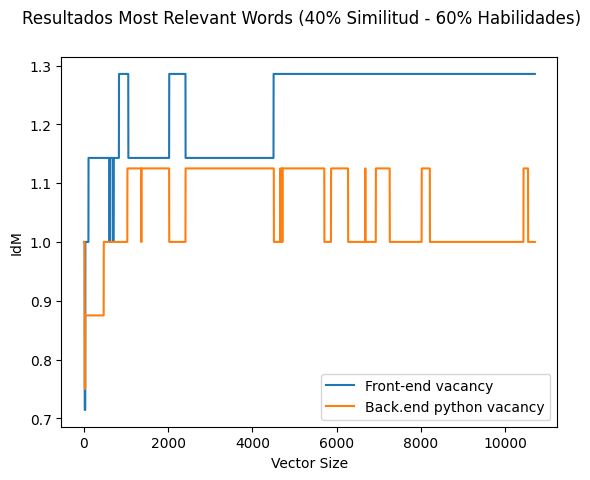

In [13]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data_F.keys())
values_F = list(data_F.values())
values_B = list(data_B.values())
# 40% 60%
fig, axs = plt.subplots()
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values_F, label="Front-end vacancy")
axs.plot(names, values_B, label="Back.end python vacancy")
axs.legend()
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Most Relevant Words (40% Similitud - 60% Habilidades)')

Text(0.5, 0.98, 'Resultados Most Relevant Words (50% Similitud - 50% Habilidades)')

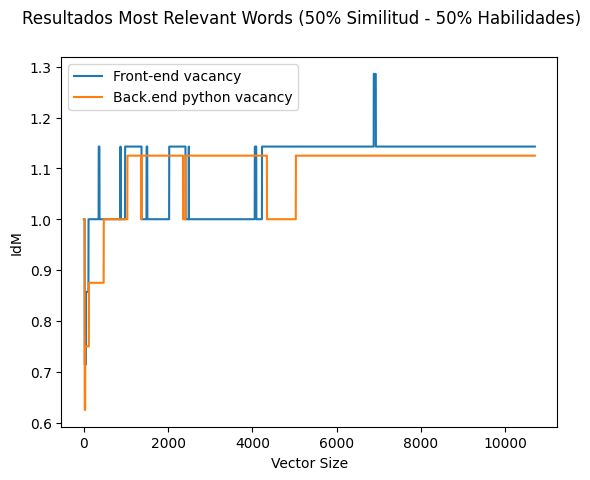

In [29]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data_F.keys())
values_F = list(data_F.values())
values_B = list(data_B.values())
# 50% 50%
fig, axs = plt.subplots()
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values_F, label="Front-end vacancy")
axs.plot(names, values_B, label="Back.end python vacancy")
axs.legend()
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Most Relevant Words (50% Similitud - 50% Habilidades)')

Text(0.5, 0.98, 'Resultados Most Relevant Words (60% Similitud - 40% Habilidades)')

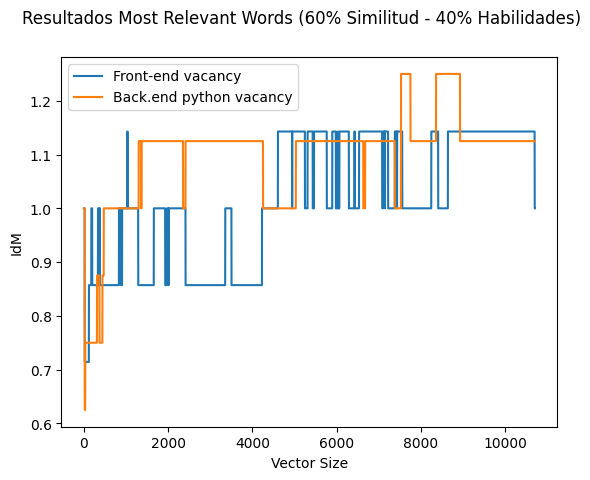

In [12]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data_F.keys())
values_F = list(data_F.values())
values_B = list(data_B.values())
# 60% 40%
fig, axs = plt.subplots()
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values_F, label="Front-end vacancy")
axs.plot(names, values_B, label="Back.end python vacancy")
axs.legend()
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Most Relevant Words (60% Similitud - 40% Habilidades)')

Text(0.5, 0.98, 'Resultados Lower Idf Words (40% Similitud - 60% Habilidades)')

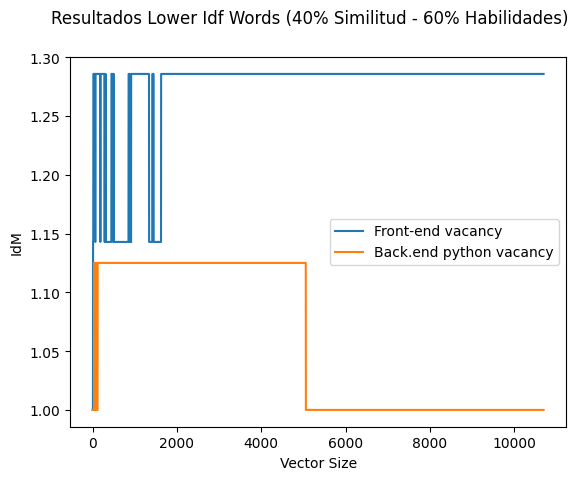

In [14]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data_F.keys())
values_F = list(data_F.values())
values_B = list(data_B.values())
# 40% 60%
fig, axs = plt.subplots()
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values_F, label="Front-end vacancy")
axs.plot(names, values_B, label="Back.end python vacancy")
axs.legend()
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Lower Idf Words (40% Similitud - 60% Habilidades)')

Text(0.5, 0.98, 'Resultados Lower Idf Words (60% Similitud - 40% Habilidades)')

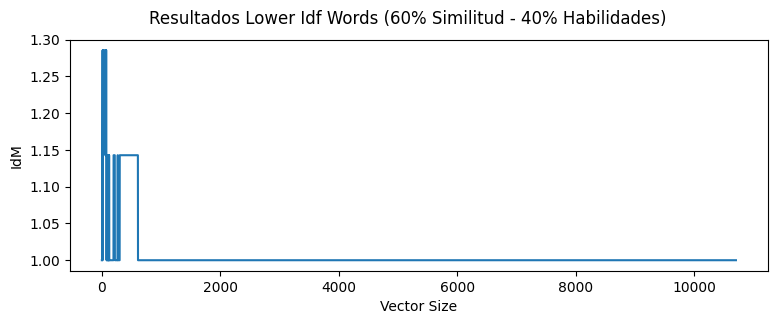

In [8]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
# 50% 50%
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values)
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Lower Idf Words (60% Similitud - 40% Habilidades)')

Text(0.5, 0.98, 'Resultados Lower Idf Words (50% Similitud - 50% Habilidades)')

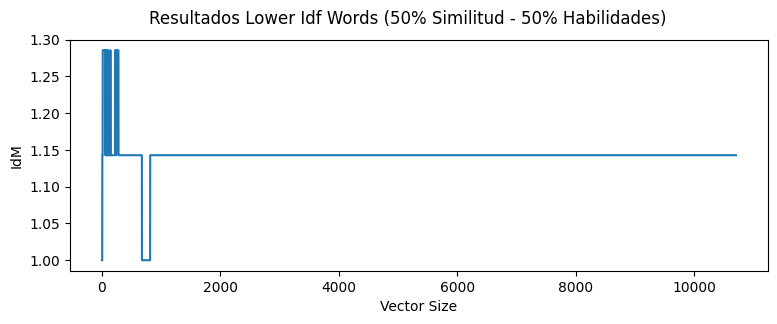

In [8]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
# 50% 50%
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values)
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Lower Idf Words (50% Similitud - 50% Habilidades)')

Text(0.5, 0.98, 'Resultados Lower Idf Words (40% Similitud - 60% Habilidades)')

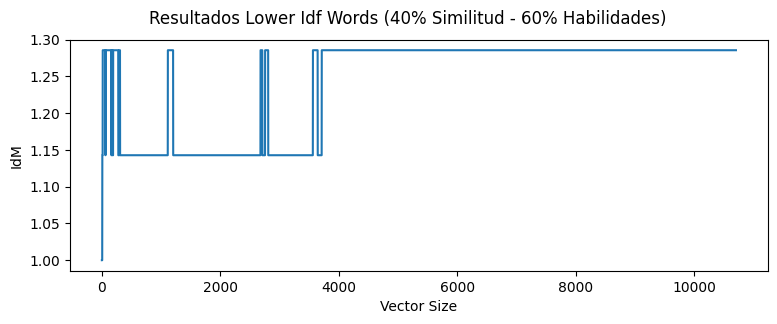

In [8]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
# 50% 50%
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values)
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Lower Idf Words (40% Similitud - 60% Habilidades)')

Text(0.5, 0.98, 'Resultados Most Relevant Words (50% Similitud - 50% Habilidades)')

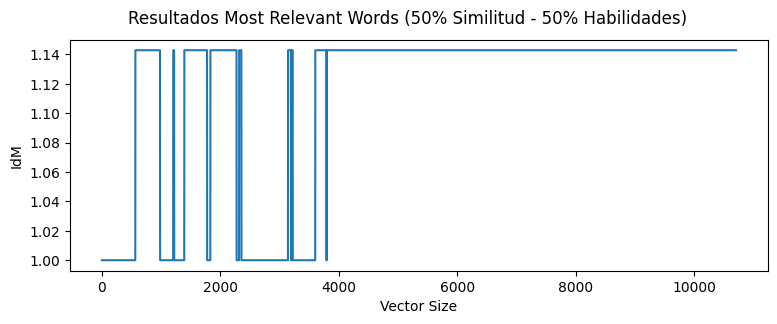

In [8]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
# 50% 50%
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values)
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Most Relevant Words (50% Similitud - 50% Habilidades)')

Text(0.5, 0.98, 'Resultados Most Relevant Words (40% Similitud - 60% Habilidades)')

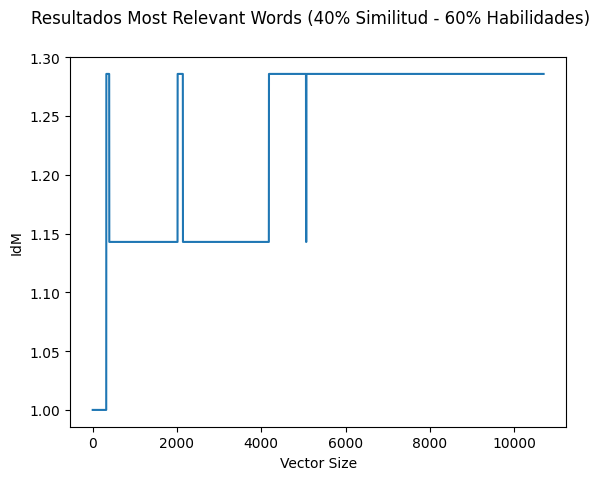

In [10]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
# 50% 50%
fig, axs = plt.subplots()
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values)
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Most Relevant Words (40% Similitud - 60% Habilidades)')

Text(0.5, 0.98, 'Resultados Most Relevant Words (60% Similitud - 40% Habilidades)')

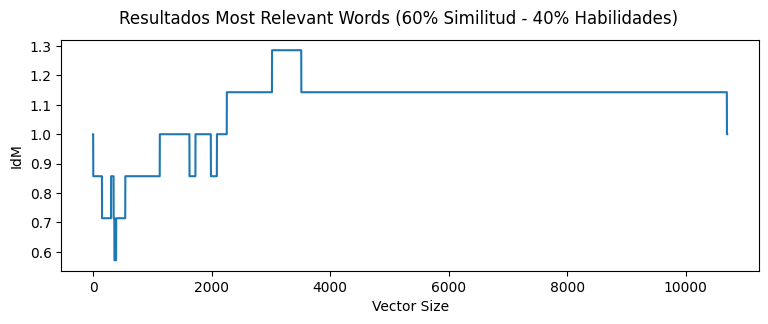

In [11]:
#data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
# 50% 50%
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
#axs[0].bar(names, values)
#axs[0].scatter(names, values)
axs.plot(names, values)
axs.set_ylabel('IdM')
axs.set_xlabel('Vector Size')
fig.suptitle('Resultados Most Relevant Words (60% Similitud - 40% Habilidades)')

In [14]:
a =32
if a == "N/A":
    print("yes")